In [2]:
import os
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
def load_top_results_per_algo(folder_path, sort_by="test", top_n=100):
    """
    Load all result CSV files from a folder and return the top-N performing results per algorithm.

    Parameters:
        folder_path (str): Path to the folder containing result CSV files.
        sort_by (str): Column name to sort by (default: 'test').
        top_n (int): Number of top rows to return per algorithm (default: 10).

    Returns:
        pd.DataFrame: Top-N rows per algorithm, sorted by `sort_by` metric.
    """
    all_results = []

    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)

            # Parse theta column if present
            for col in df.columns:
                if "theta" in col and "parsed" not in col:
                    df["theta_parsed"] = df[col].apply(ast.literal_eval)
                    break

            all_results.append(df)

    if not all_results:
        raise ValueError("No CSV files found in the specified folder.")

    full_df = pd.concat(all_results, ignore_index=True)

    # Top-N results per algorithm
    top_per_alg = (
        full_df.sort_values(by=sort_by, ascending=True)  # lower is better if it's loss
        .groupby("alg")
        .head(top_n)
        .reset_index(drop=True)
    )

    return top_per_alg


In [22]:
best_df = load_top_results_per_algo("./results", sort_by="test", top_n=50)
print(best_df[["alg", "train", "test", "theta_parsed"]])

     alg         train         test  \
0    ABC -14100.148950 -7073.858996   
1    ABC -20438.384673 -6655.038623   
2    ABC -33443.850039 -6418.507385   
3    ABC -12536.825475 -6367.908836   
4    ABC -26498.789364 -6176.596040   
..   ...           ...          ...   
195  PSO    -19.152959 -1374.395323   
196  PSO    -19.152959 -1374.395323   
197  PSO    -19.152959 -1374.395323   
198  PSO    -19.152959 -1374.395323   
199  PSO    -19.237658 -1374.395323   

                                          theta_parsed  
0    [5.0, 0.9103997401714746, 0.4156876926177668, ...  
1    [5.0, 2.4483625982270842, 0.20857848769361126,...  
2    [5.0, 0.5450061022217905, 0.17548519107018212,...  
3    [7.600996060301464, 0.7713224248767605, 0.1945...  
4    [5.464655063128193, 1.8666675242158257, 0.3446...  
..                                                 ...  
195  [27.628384812983146, 1.280701153772758, 0.1872...  
196  [27.890000462142275, 1.404594963884449, 0.2203...  
197  [28.284065641

In [23]:
best_df

,alg,seed,train,test,theta,pop_size,gens,stalled_gens,tolerance,patience,fitness_history,time(seconds),theta_parsed
0,ABC,726,-14100.148950,-7073.858996,"[5.0, 0.9103997401714746, 0.4156876926177668, ...",50,15,10,0.0001,10,"[-3155.902035333477, -3733.9658082216347, -373...",6.35,"[5.0, 0.9103997401714746, 0.4156876926177668, ..."
1,ABC,792,-20438.384673,-6655.038623,"[5.0, 2.4483625982270842, 0.20857848769361126,...",50,24,10,0.0001,10,"[-4098.932092456142, -9667.667284418443, -1037...",10.51,"[5.0, 2.4483625982270842, 0.20857848769361126,..."
2,ABC,736,-33443.850039,-6418.507385,"[5.0, 0.5450061022217905, 0.17548519107018212,...",50,28,10,0.0001,10,"[-1922.0146864544893, -2148.63077903823, -3033...",12.00,"[5.0, 0.5450061022217905, 0.17548519107018212,..."
3,ABC,783,-12536.825475,-6367.908836,"[7.600996060301464, 0.7713224248767605, 0.1945...",50,16,10,0.0001,10,"[-5717.25581082823, -5717.25581082823, -6235.3...",6.59,"[7.600996060301464, 0.7713224248767605, 0.1945..."
4,ABC,916,-26498.789364,-6176.596040,"[5.464655063128193, 1.8666675242158257, 0.3446...",50,32,10,0.0001,10,"[-4245.707041829079, -4245.707041829079, -4245...",13.50,"[5.464655063128193, 1.8666675242158257, 0.3446..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,PSO,378,-19.152959,-1374.395323,"[27.628384812983146, 1.280701153772758, 0.1872...",50,11,10,0.0001,10,"[-22.02751540861482, -22.02751540861482, -22.0...",1.53,"[27.628384812983146, 1.280701153772758, 0.1872..."
196,PSO,442,-19.152959,-1374.395323,"[27.890000462142275, 1.404594963884449, 0.2203...",50,11,10,0.0001,10,"[-31.0161637242236, -23.03007158613753, -23.03...",1.50,"[27.890000462142275, 1.404594963884449, 0.2203..."
197,PSO,460,-19.152959,-1374.395323,"[28.28406564134325, 1.034554004171981, 0.05, 1...",50,11,10,0.0001,10,"[-32.63058543778802, -32.63058543778802, -31.1...",1.44,"[28.28406564134325, 1.034554004171981, 0.05, 1..."
198,PSO,596,-19.152959,-1374.395323,"[28.031220824687505, 0.8591809107358683, 0.333...",50,11,10,0.0001,10,"[-46.761174421592294, -46.761174421592294, -21...",1.78,"[28.031220824687505, 0.8591809107358683, 0.333..."


In [33]:
def plot_top_algo_comparison(top_df, metric="test"):
    """
    Visualize the top N results for each algorithm using a boxplot and stripplot.

    Parameters:
        top_df (pd.DataFrame): DataFrame of top-N results per algorithm.
        metric (str): Metric column to visualize (default: 'test').
    """
    if metric not in top_df.columns:
        raise ValueError(f"Metric '{metric}' not found in DataFrame.")

    plt.figure(figsize=(10, 6))
    sns.boxplot(x="alg", y=metric, data=top_df, palette="Set2", showfliers=False)
    sns.stripplot(x="alg", y=metric, data=top_df, color="black", size=5, jitter=True, alpha=0.7)

    plt.title(f"Top {top_df["alg"].value_counts().iloc[0]} {metric.capitalize()} Scores per Algorithm")
    plt.ylabel(f"{metric.capitalize()} Score")
    plt.xlabel("Algorithm")
    plt.grid(True, axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()  

C:\Users\thanh\AppData\Local\Temp\ipykernel_7632\1150322175.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="alg", y=metric, data=top_df, palette="Set2", showfliers=False)


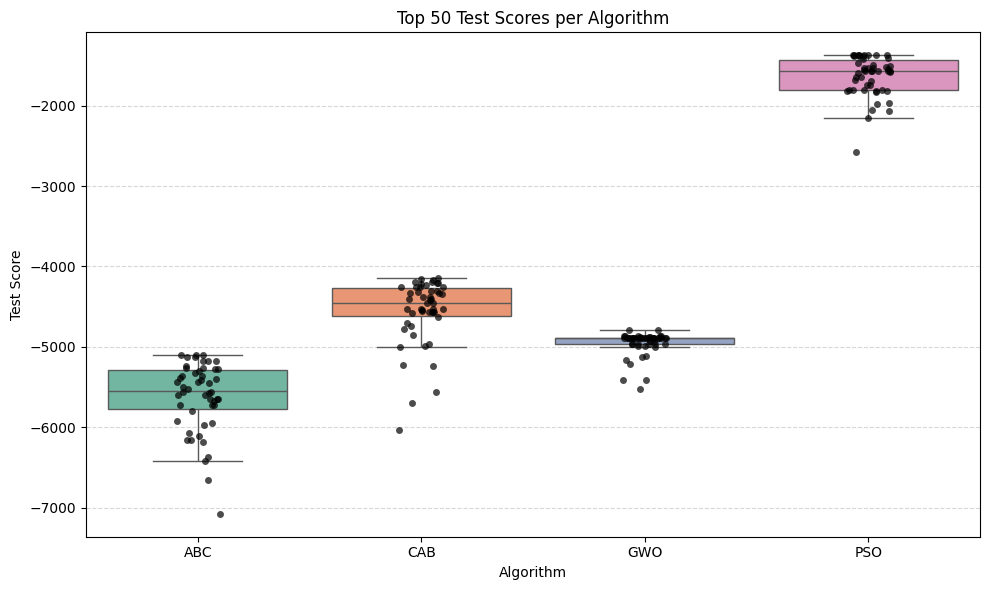

In [34]:
plot_top_algo_comparison(best_df, metric="test")

In [16]:
def plot_best_pop_and_gens(best_df):
    """
    Plot the best population size and generation count for each algorithm.

    Parameters:
        best_df (pd.DataFrame): Output from summarise_best_hyperparams_per_algo().
                                Must contain columns: 'alg', 'pop_size', 'gens'
    """
    if not {"alg", "pop_size", "gens"}.issubset(best_df.columns):
        raise ValueError("DataFrame must contain 'alg', 'pop_size', and 'gens' columns.")

    plt.figure(figsize=(10, 6))
    ax = sns.scatterplot(
        data=best_df,
        x="gens",
        y="pop_size",
        hue="alg",
        style="alg",
        s=150,
        palette="tab10"
    )

    for _, row in best_df.iterrows():
        plt.text(row["gens"] + 0.5, row["pop_size"] + 0.5, row["alg"], fontsize=10)

    plt.title("Best Population Size vs Generation Count per Algorithm")
    plt.xlabel("Number of Generations")
    plt.ylabel("Population Size")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend(title="Algorithm")
    plt.tight_layout()
    plt.show()
    

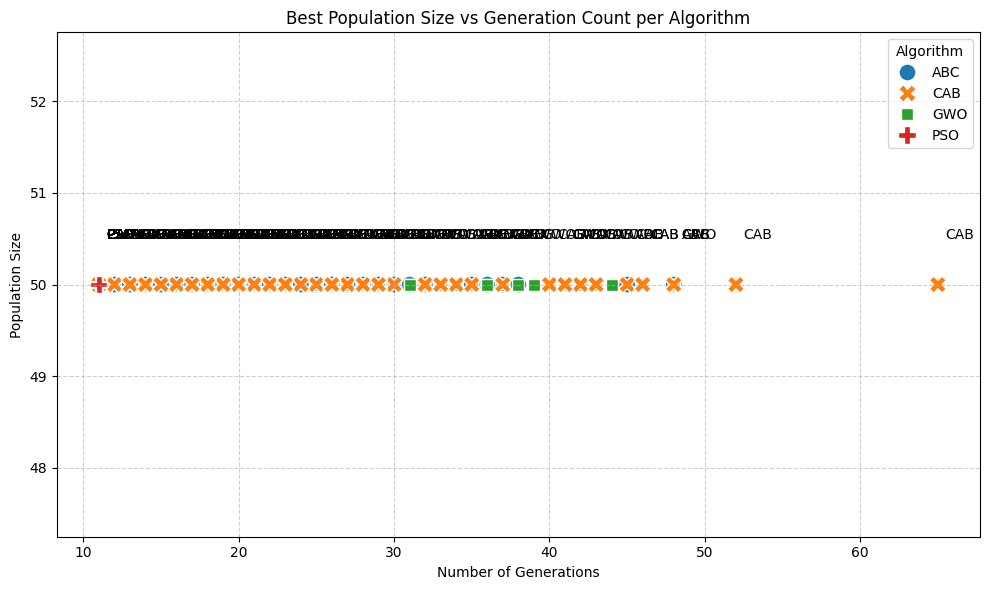

In [17]:
plot_best_pop_and_gens(best_df)

In [18]:
gwo_only = best_df[best_df["alg"] == "GWO"]
cab_only = best_df[best_df["alg"] == "CAB"]
abc_only = best_df[best_df["alg"] == "ABC"]
pso_only = best_df[best_df["alg"] == "PSO"]

In [19]:
print(gwo_only)

     alg  seed         train         test  \
29   GWO   569 -27205.157268 -5526.311934   
35   GWO   609 -39181.976912 -5405.171382   
36   GWO   568 -38220.304728 -5405.171382   
50   GWO   877 -38663.241173 -5207.989677   
54   GWO   240 -44112.939292 -5165.374994   
..   ...   ...           ...          ...   
206  GWO   574 -53982.905995 -4715.400383   
207  GWO   160 -53982.905995 -4715.400383   
208  GWO   675 -53982.905995 -4715.400383   
209  GWO   879 -53982.905995 -4715.400383   
210  GWO   516 -53982.905995 -4715.400383   

                                                 theta  pop_size  gens  \
29   [5.0, 1.3260626809720857, 0.43524100876147975,...        50    21   
35   [5.0, 2.3562093637865815, 0.09875841670985645,...        50    30   
36   [5.0, 2.3289065866388445, 0.09408319500033856,...        50    29   
50   [5.0, 2.0141505145800536, 0.1415688956052974, ...        50    24   
54   [5.0, 1.5669457149003458, 0.05, 108.7651078903...        50    22   
..             

In [35]:
def plot_theta_distribution(df, theta_col="theta_parsed", alg_filter=None):
    """
    Plot distribution of each theta parameter in a DataFrame, rounding integer-like parameters.

    Parameters:
        df (pd.DataFrame): DataFrame with a theta_parsed column (list of floats).
        theta_col (str): Name of the column with parsed theta lists.
        alg_filter (str or list, optional): Filter to specific algorithms if provided.
    """
    if alg_filter is not None:
        df = df[df["alg"].isin([alg_filter] if isinstance(alg_filter, str) else alg_filter)]

    theta_labels = [
        "d1 (fast window)",
        "t1 (fast type)",
        "α1 (fast alpha)",
        "d2 (slow window)",
        "t2 (slow type)",
        "α2 (slow alpha)",
        "buy_delay",
        "sell_delay"
    ]

    theta_matrix = np.vstack(df[theta_col].values)
    n_params = theta_matrix.shape[1]

    # Apply rounding to integer-like dimensions
    rounded = theta_matrix.copy()
    round_indices = [0, 1, 3, 4, 6, 7]  # indices of int-based parameters
    rounded[:, round_indices] = np.round(rounded[:, round_indices])

    fig, axes = plt.subplots(nrows=(n_params + 2) // 3, ncols=3, figsize=(15, 4 * ((n_params + 2) // 3)))
    axes = axes.flatten()

    for i in range(n_params):
        label = theta_labels[i] if i < len(theta_labels) else f"Theta[{i}]"
        sns.histplot(rounded[:, i], bins=20, ax=axes[i], kde=True, color="skyblue", edgecolor="black")
        axes[i].set_title(f"{label} Distribution")
        axes[i].set_xlabel(label)
        axes[i].set_ylabel("Count")

    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.suptitle("Theta Parameter Distributions", fontsize=16)
    plt.tight_layout()
    plt.show()


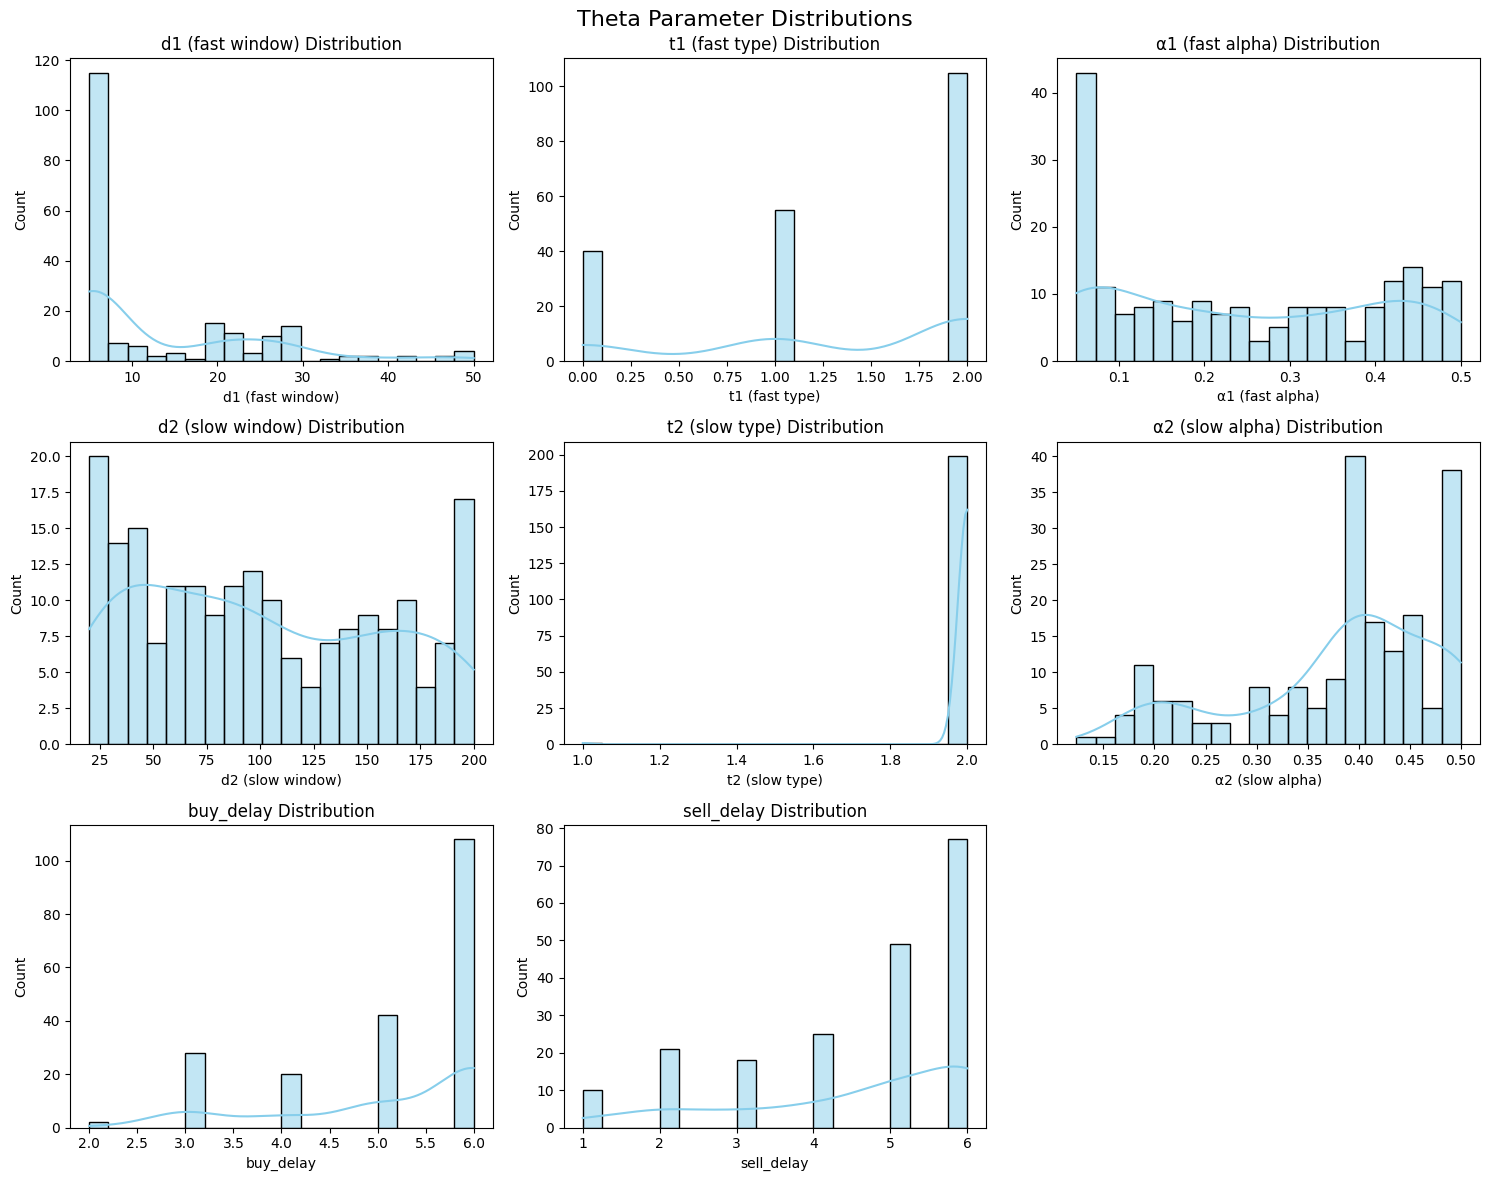

In [37]:
plot_theta_distribution(best_df)